<a href="https://colab.research.google.com/github/christybiji/MIT-IDSS-Lead-Scoring-Model/blob/main/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction_P2Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# For tuning the model
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
extraalearn = pd.read_csv('/content/drive/MyDrive/MIT IDSS : Data Science and Machine Learning /Project 2/ExtraaLearn.csv')

In [ ]:
extraalearn.head(4)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1


In [ ]:
extraalearn.tail(4)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [ ]:
extraalearn.shape

(4612, 15)

#### **Observations:**
- The dataset has 4612 rows and 15 columns.

In [ ]:
#Making a copy of the dataframe 'extraalearn'
data = extraalearn.copy()

In [ ]:
#data.dtypes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### **Observations**:
- ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referrals; **10 out of 15 columns are type 'object'.**
- Rest of the columns are numerical columns.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
ID,4612,4612,EXT4612,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [ ]:
data.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


##### **Understanding the distribution of unique values in each category.**

In [ ]:
# Printing the % sub categories of each category
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in ID are :
ID
EXT4612    1
EXT001     1
EXT002     1
EXT003     1
EXT4596    1
          ..
EXT009     1
EXT008     1
EXT007     1
EXT006     1
EXT005     1
Name: count, Length: 4612, dtype: int64
**************************************************
Unique values in current_occupation are :
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
**************************************************
Unique values in first_interaction are :
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
**************************************************
Unique values in profile_completed are :
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
**************************************************
Unique values in last_activity are :
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
*****************************

In [ ]:
data.duplicated().sum()

np.int64(0)

#### **Observations**:
- **ID**: It is a unique identifier for leads and can be dropped as it wouldn't add any information to our analysis.
- **Age** : The average age is 46yrs,  minimum age is 18 and the max age is 63.
- **current_occupation** : dtype: object, 3 unique values with 'professional' as top value.
- **first_interaction** :	dtype: object, 2 unique value with 'website' as the most frequent value..
- **profile_completed** : dtype: object, 3 unique value with 'High' as the most frequent value.
- **website_visits** : have 27 unique values, with the an average of 3 visits and maximum of 30 visits.
- **time_spent_on_website** : The average time spent on the website is 724, with a maximum of 2537. There are 1623 unique values. Assuming the units of time spent is in seconds.
- **page_views_per_visit** : On average the number of pages on the website viewed during the visits is 3. There are 2414 unique values.
- **last_activity** : dtype: object, 3 unique with 'Email Activity' as the most frequent value.
- **print_media_type1** : dtype: object, has 2 unique values with 'No' having high  frequency in this category with 4115 values.
- **print_media_type2** :dtype: object, has 2 unique values with 'No' having high  frequency in this category with 4379 values.
- **digital_media** : dtype: object, has 2 unique values with 'No' having high  frequency in this category with 4085 values
- **educational_channels** :dtype: object, has 2 unique values with 'No' having high frequency in this category with 3907 values
- **referral** : dtype: object, has 2 unique values with 'No' having high  frequency in this category with 4519 values
- **status** : The average is 0.3 for if the lead was converted to a paid customer or not.

- There seems to be no duplicated rows in the dataset.

## Data Preprocessing before EDA


In [ ]:
#ID has unique values and cannot help with prediction.
data.drop(["ID"], axis=1, inplace=True)

In [ ]:
#Checking data after removal of column 'ID'
data.head(2)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

##### **Distribution of the numerical data types in the dataframe.**

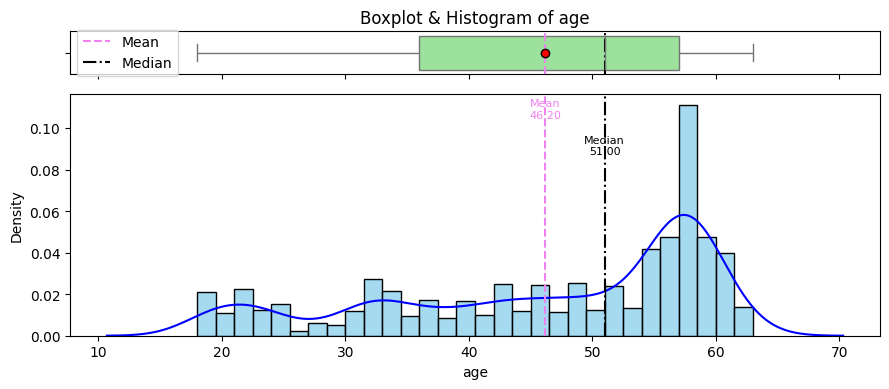

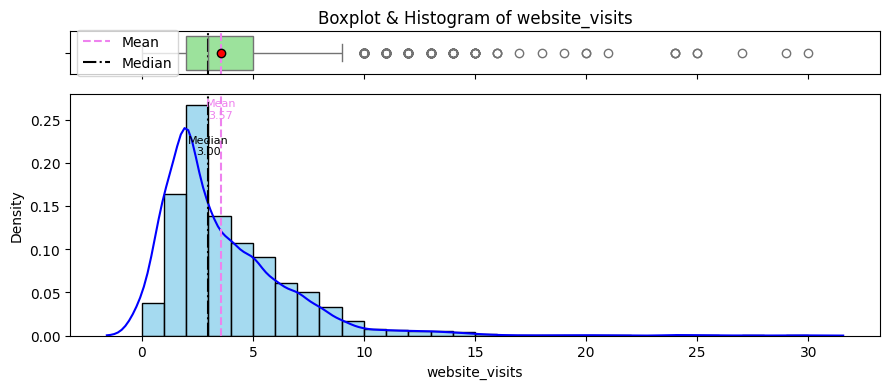

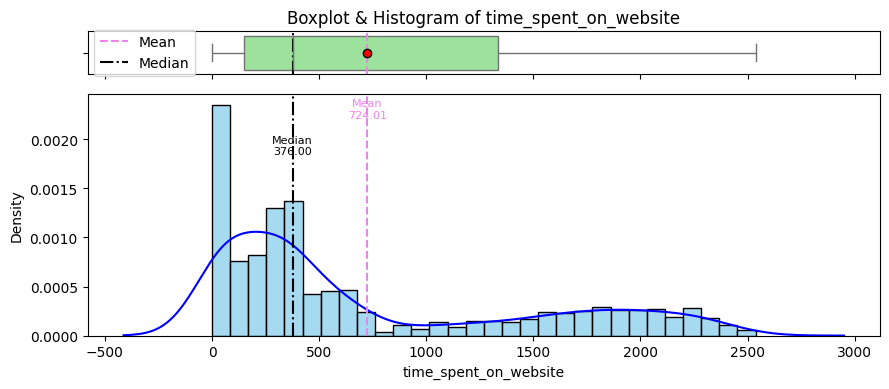

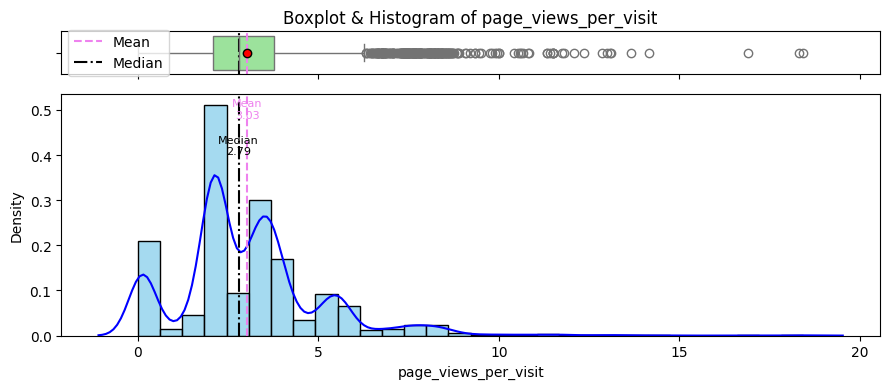

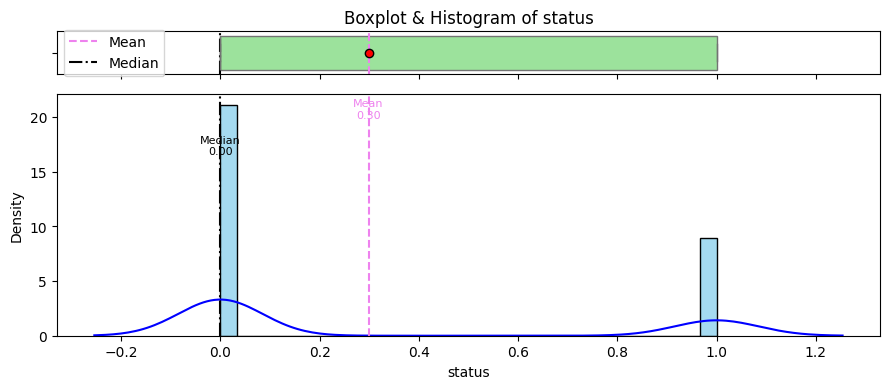

In [ ]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

def plot_box_hist_distribution(data, numerical_cols, figsize=(8, 7), bins=30,
                            hist_color='skyblue', box_color='lightgreen', kde_color='blue'):
    """
    Plots a boxplot above a histogram with KDE for each numerical column.
    Shows and annotates mean, median, and mode in both plots.
    """
    for col in numerical_cols:
        col_data = data[col].dropna()

        mean_val = col_data.mean()
        median_val = col_data.median()


        # Create figure with boxplot on top and histogram below
        fig, (ax_box, ax_hist) = plt.subplots(
            2, 1, sharex=True, figsize=figsize,
            gridspec_kw={'height_ratios': [0.15, 0.85]}
        )

        # --- Boxplot ---
        sns.boxplot(x=col_data, ax=ax_box, color=box_color, showmeans=True,
                    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})

        # Vertical lines in boxplot
        ax_box.axvline(mean_val, color='violet', linestyle='--', label='Mean')
        ax_box.axvline(median_val, color='black', linestyle='-.', label='Median')


        ax_box.set(title=f'Boxplot & Histogram of {col}')
        ax_box.set_xlabel("")
        ax_box.legend(loc='center left')

        # --- Histogram + KDE ---
        sns.histplot(col_data, bins=bins, stat='density', ax=ax_hist, color=hist_color)
        sns.kdeplot(col_data, ax=ax_hist, color=kde_color)

        # Lines and annotations on histogram
        ax_hist.axvline(mean_val, color='violet', linestyle='--')
        ax_hist.axvline(median_val, color='black', linestyle='-.')


        # Add text annotations
        ax_hist.text(mean_val, ax_hist.get_ylim()[1]*0.9, f'Mean\n{mean_val:.2f}',
                     color='violet', ha='center', fontsize=8)
        ax_hist.text(median_val, ax_hist.get_ylim()[1]*0.75, f'Median\n{median_val:.2f}',
                     color='black', ha='center', fontsize=8)

        ax_hist.set_xlabel(col)

        plt.tight_layout()
        plt.show()

# Call the function
plot_box_hist_distribution(data, numerical_cols, figsize=(9, 4))


##### **Observations:**

**1. Age**
- The distribution is left-skewed with the left tail and median>mean but multi-modal observations can be observed overall.
- The highest peak is observed at 55-60 years, followed by less prominent peak at ~20 years and ~35 years.
- The mean is indicated around age 46 years.
- The median is indicated around age 51 years.

**2. website_visits**
- The data is right skewed. Here, Mean > Median > Mode
- Highest peak is observed at 2-3 website_visits.
- The mean is 3.5 website_visits.
- The median is around 3 website_visits.
- The outliers lie towards the right of the boxplot.
-  Outliers range from 10-30 website visits

**3. time_spent_on_website:** *Assuming the units to be in seconds.*
- Distribution looks right-skewed.The relationship is Mode < Median < Mean
- The mode is clearly at the low end, near 0-200 seconds.
- The median is around ~376 seconds.
- The mean is around ~724 seconds.
- This data can be converted to minutes for better interpretability.

**4. page_views_per_visit:**
- The distribution is right-skewed with the right tail and mean>median but multi-modal observations can be observed overall.
- The mean is around 3.5 page_views_per_visit.
- The median is around 3 page_views_per_visit.
- The highest peak  is centered around 2-3 page views per visit.
- There's a distinct secondary, smaller peak around 4 page views per visit.

**5. status:**
- Observed, 0 = no lead conversion and 1 = lead conversion.

##### **Converting into time spent on website from seconds into minutes.**

In [ ]:
#since the 'time_spent_on_website' follows the same pattern after converting 'time_spent_minutes'.
data['time_spent_minutes'] = data['time_spent_on_website'] / 60

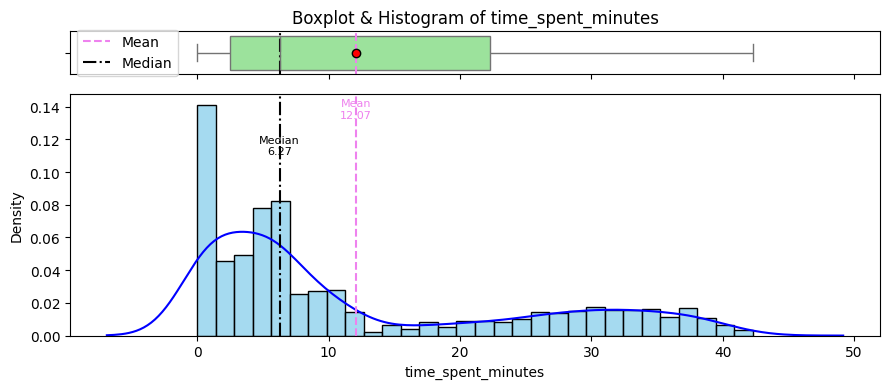

In [ ]:
# Ploting to see the pattern for column 'time spent minutes'
plot_box_hist_distribution(data, ['time_spent_minutes'], figsize=(9, 4), bins=30, hist_color='skyblue', box_color='lightgreen');

##### **Observations: time_spent_minute:**
- The data follows the distribution before to conversion to minutes.
- Distribution looks right-skewed.The relationship is Mode < Median < Mean
- The mode is clearly at the low end.
- The median is around ~6 minutes.
- The mean is around ~12 minutes.
- The data is easier to interprate after conversion to minute.

In [ ]:
#Removing the column data 'time_spent_on_website' since the value is converted to 'time_spent_minutes'
data.drop(["time_spent_on_website"], axis=1, inplace=True)

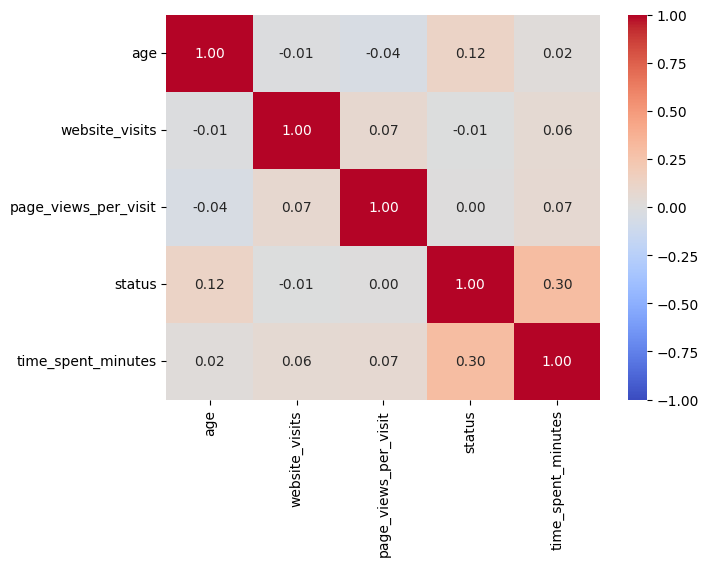

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

##### **Observations:**
- There is positive correlation observed in 'time_spent_minutes' vs status.
- Age also seem to slightly positively correlate with status.
- While there seems to be a slight negative correlation for status with website_visits.
- page_views_per_visit vs status has neutral relation.

#### **Understanding trends in categorical values**

In [ ]:
# Function 'plot_stacked_bars' plots categorical values and compares it the dependent variable 'status'

def plot_stacked_bars(data, features, target, figsize=(6, 5), perc=False):
    """
    Plots multiple stacked bar charts vertically with optional percentage labels.

    Parameters:
    - data: pd.DataFrame — The input DataFrame.
    - features: list of str — List of categorical column names to compare against the target.
    - target: str — The categorical target variable for grouping (e.g., 'status').
    - figsize: tuple — Size of the overall figure.
    - perc: bool — If True, display percentage values on the bars.

    Returns:
    - Matplotlib figure and axes for further customization.
    """
    num_features = len(features)
    fig, axes = plt.subplots(num_features, 1, figsize=figsize, sharex=True)

    if num_features == 1:
        axes = [axes]

    for ax, feature in zip(axes, features):
        # Compute percentage crosstab
        ctab = pd.crosstab(data[feature], data[target], normalize='index') * 100
        bars = ctab.plot(kind='bar', stacked=True, ax=ax, legend=False)

        ax.set_ylabel('Lead Conversion %')
        ax.set_title(f'{feature} vs {target}')

        if perc:
            # Annotate each segment with percentage
            for container in bars.containers:
                labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
                bars.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white')

    # Show legend only once (on the first plot or outside)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', title=target)

    plt.tight_layout()
    return fig, axes



##### **Current_Occupation vs Status**
- Q1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

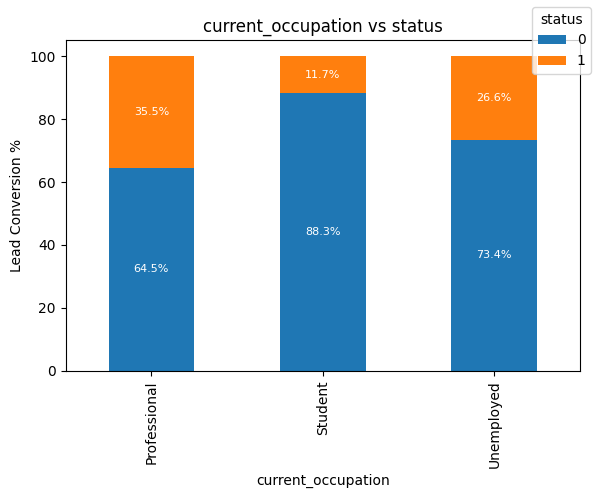

In [ ]:
plot_stacked_bars(data=data, features=['current_occupation'], target='status',  perc=True);

#### **Observations:**
- 35.5% leads who convert fall into 'Professional' category.
- Second lead to potential customer is in 'Unemployed' category around 26.6% followed by 'Student' category.

##### **First_Interaction vs Status**.
- Q2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

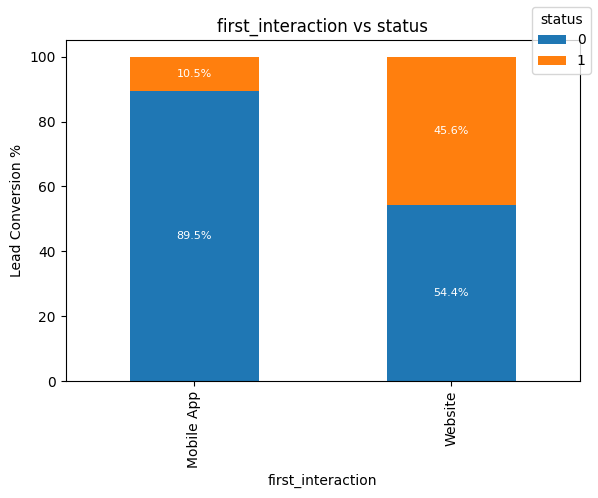

In [ ]:
plot_stacked_bars(data=data, features=['first_interaction'], target='status',  perc=True);

##### **Observations:**
- 45.6% who interact with Website have highest lead conversion rate.
- 10.5% who interact with Mobile App convert to lead.

##### **Last_Activity vs Status:**
-  Q3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

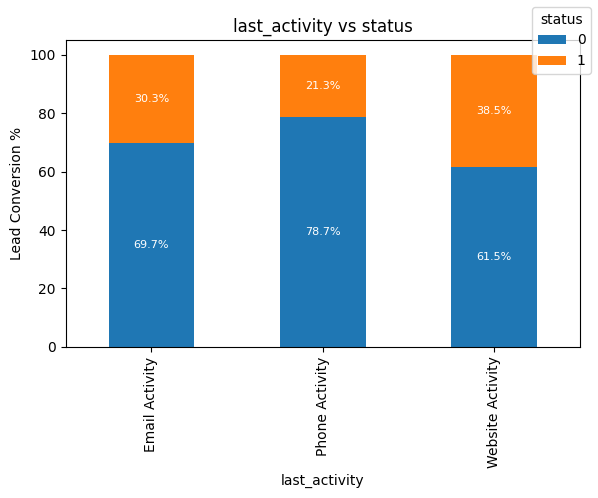

In [ ]:
plot_stacked_bars(data=data, features=['last_activity'], target='status',  perc=True);

##### **Observations:**
- 38.5% consumers who interact with Website as their last activity have the highest lead conversion rate followed by Email activity (30.3%) and Phone activity (21.3%).

##### **Leads from various channel vs status**
 - Q4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

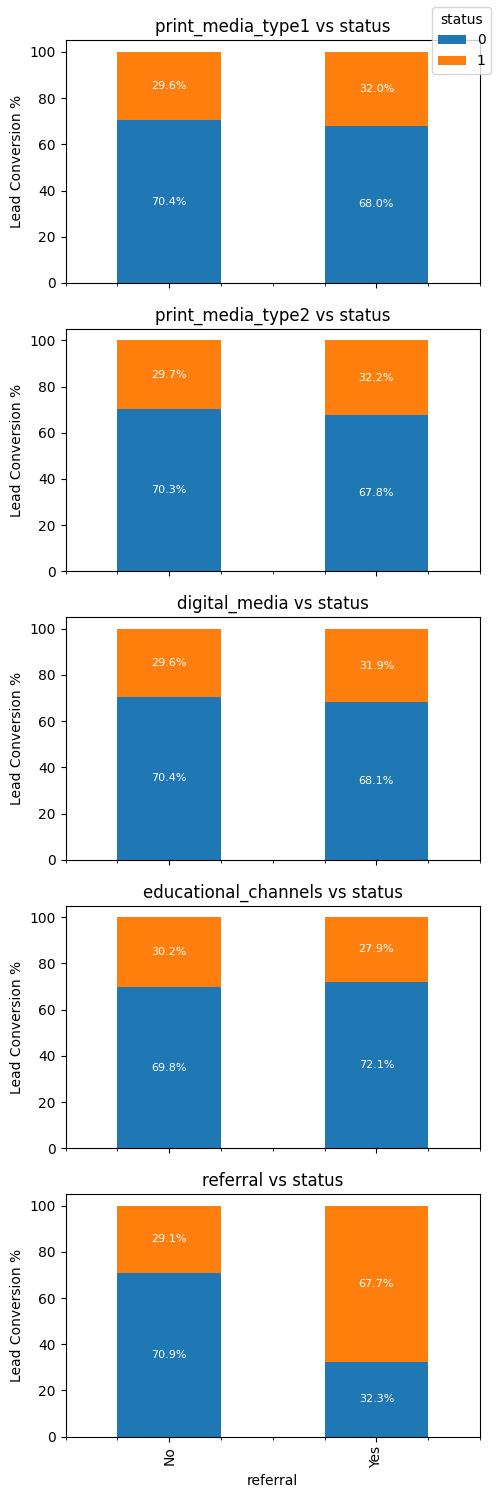

In [ ]:
# List of columns for the stacked barplots
columns_to_plot = ['print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']
#Plot the data that gets leads from various channels.
plot_stacked_bars(data, columns_to_plot, 'status', figsize=(5,15), perc=True);

##### **Observations:**
- **print_media_type1:** 32% lead conversion rate observed for consumers who interacted with 'print_media_type1'.
- **print_media_type2:** 32.2% lead conversion rate observed for consumers who interacted with 'print_media_type2'.
- **digital_media:** 31.9% lead conversion rate observed for consumers who interacted with 'digital_media'.
- **educational_channels:** Higher conversion rate (30.2%) is observed for consumers who did not interact with 'educational_channels'
- **referral:** 67.7% lead conversion is observed in those received referrals.

- Overall, highest lead conversion was observed in those who received referrals.

##### **Profile_completed vs Status**
- Q5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

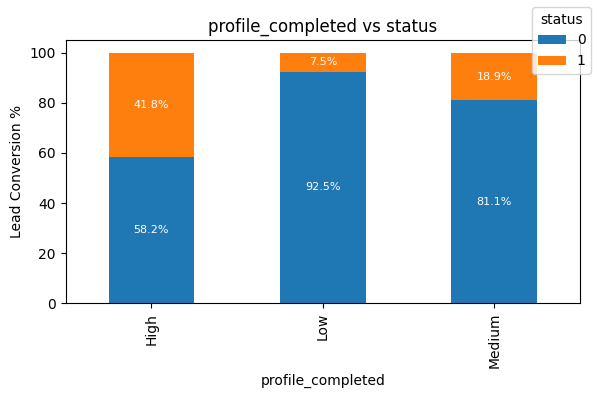

In [ ]:
plot_stacked_bars(data=data, features=['profile_completed'], target='status', figsize=(6,4), perc=True);

##### **Observations:**
- It is observed that having more details about a prospect increase the chances of lead conversion .
- The higher the information or profile_completed by a lead, the higher the chance of the lead converting to a paid status. High (41.8% conversion) > Medium (18.9% conversion) > Low (7.5% conversion)

## Data Preprocessing

- Missing value treatment (if needed) -  No missing value observed in the data.
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum()/len(data) * 100

,0
age,0.00000
website_visits,3.33912
page_views_per_visit,5.57242
status,0.00000
time_spent_minutes,0.00000


**Observations:**
*  Here, we are not not treating them since we want the model to learn the underlying pattern for such customers.

##### **Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
X = data.drop(["status"], axis=1)
y = data["status"]
X.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,time_spent_minutes
0,57,Unemployed,Website,High,7,1.86100,Website Activity,Yes,No,Yes,No,No,27.31667
1,56,Professional,Mobile App,Medium,2,0.32000,Website Activity,No,No,No,Yes,No,1.38333
2,52,Professional,Website,Medium,3,0.07400,Website Activity,No,No,Yes,No,No,5.50000
3,53,Unemployed,Website,High,4,2.05700,Website Activity,No,No,No,No,No,7.73333
4,23,Student,Website,High,4,16.91400,Email Activity,No,No,No,No,No,10.00000


- Splitting the data into 70% train and 30% test set


In [ ]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
X_train.shape, X_test.shape

((3228, 13), (1384, 13))

In [ ]:
X_train.dtypes

,0
age,int64
current_occupation,object
first_interaction,object
profile_completed,object
website_visits,int64
page_views_per_visit,float64
last_activity,object
print_media_type1,object
print_media_type2,object
digital_media,object


In [ ]:
X_train.head(2)

,age,current_occupation,first_interaction,profile_completed,website_visits,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,time_spent_minutes
389,57,Professional,Mobile App,High,1,2.19700,Email Activity,No,No,No,Yes,No,9.70000
1162,35,Unemployed,Website,Medium,2,5.11100,Email Activity,No,No,Yes,No,No,32.28333


In [ ]:
X_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3228.00000,NaN,NaN,NaN,46.15520,13.14864,18.00000,36.00000,51.00000,57.00000,63.00000
current_occupation,3228,3,Professional,1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,3228,2,Website,1770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,3228,3,High,1580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,3228.00000,NaN,NaN,NaN,3.64281,2.87036,0.00000,2.00000,3.00000,5.00000,29.00000
page_views_per_visit,3228.00000,NaN,NaN,NaN,3.08317,1.97903,0.00000,2.09375,2.86500,3.77800,18.43400
last_activity,3228,3,Email Activity,1581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,3228,2,No,2873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,3228,2,No,3057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
digital_media,3228,2,No,2869,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_train.head(2)

,status
389,0
1162,0


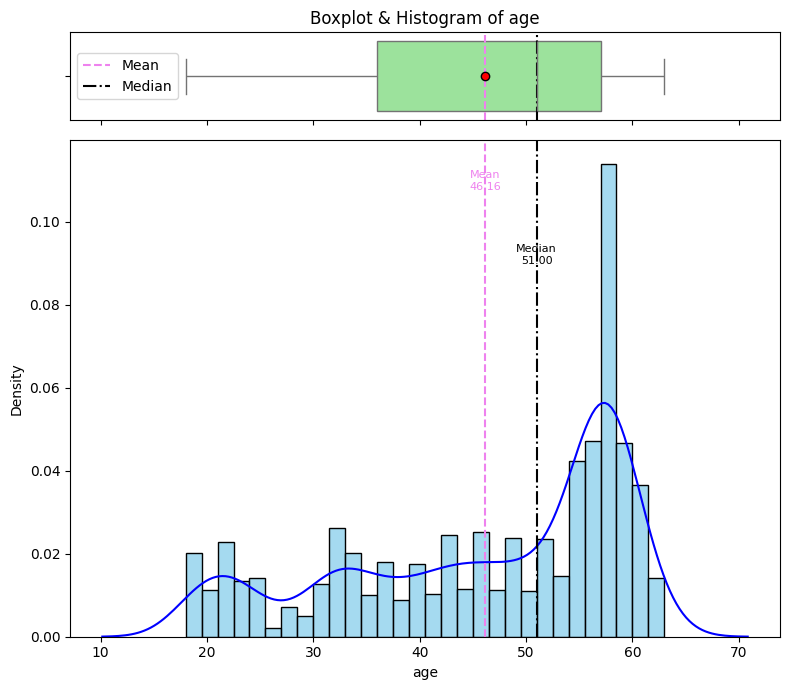

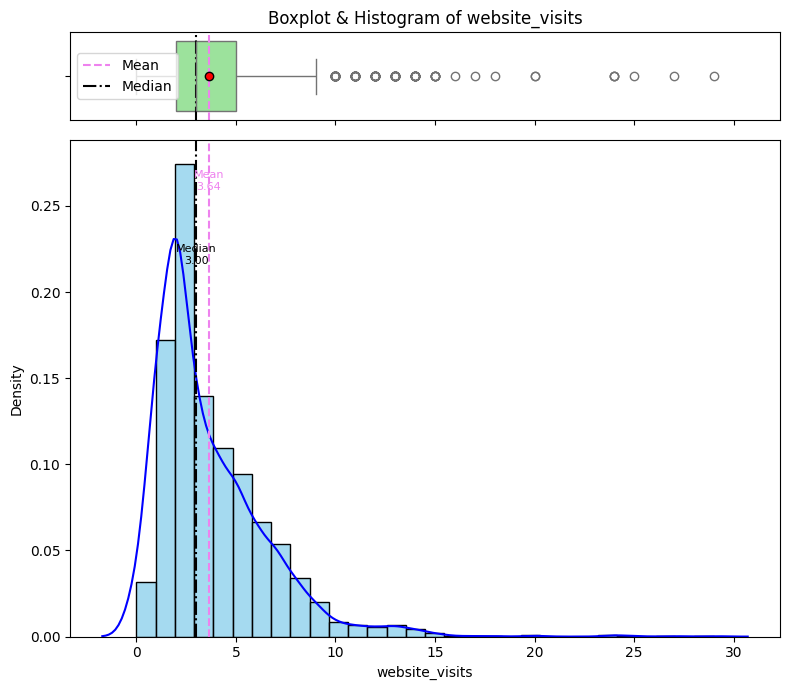

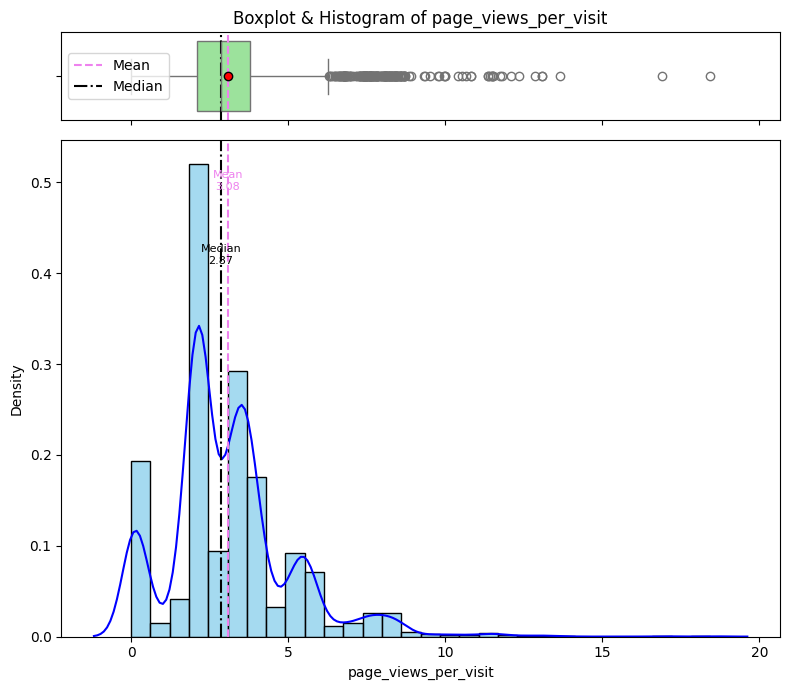

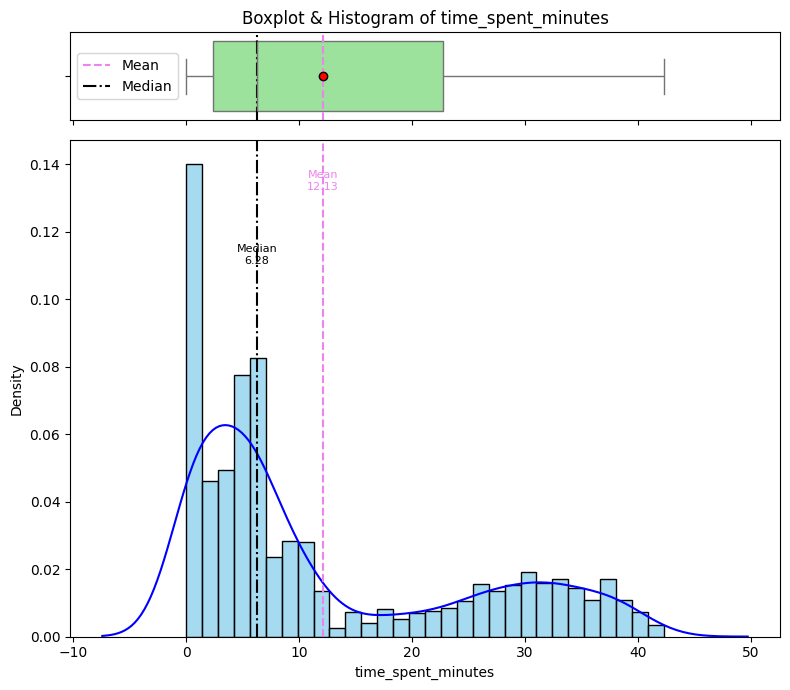

In [ ]:
X_train_num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

plot_box_hist_distribution(X_train, X_train_num_cols);

In [ ]:
#to see if the independent and dependent variable relate the similarly after splitting.
#Here the target variable is the status column in the original dataset.
Xy_train = X_train.copy()
Xy_train['target'] = y_train

##### **Adding the y_train to the X_train dataset to check for trends in categorical variables.**

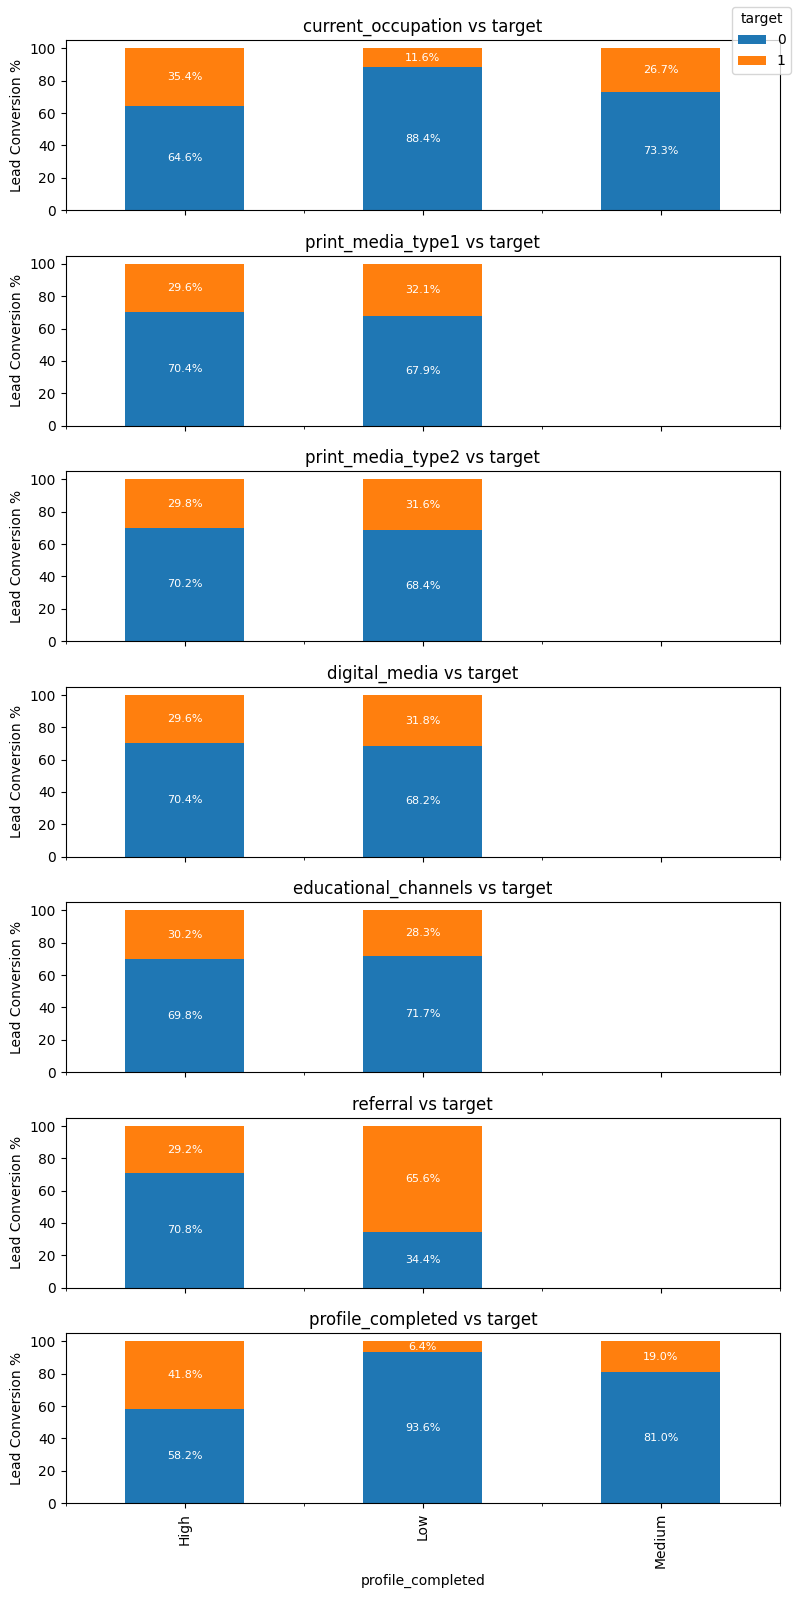

In [ ]:
# List of columns for the stacked barplots for all caetgorical values
columns_to_plot = ['current_occupation','print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral', 'profile_completed']

#Plot the data that gets leads from various channels.
plot_stacked_bars(data=Xy_train, features=columns_to_plot, figsize=(8,16), target='target', perc = True);

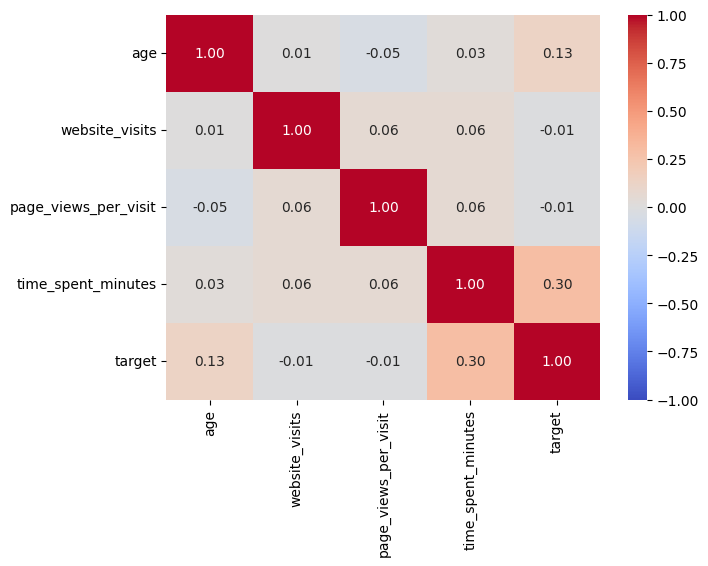

In [ ]:
numeric_Xy_train = Xy_train.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_Xy_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

age                     0
current_occupation      0
first_interaction       0
profile_completed       0
website_visits          0
page_views_per_visit    0
last_activity           0
print_media_type1       0
print_media_type2       0
digital_media           0
educational_channels    0
referral                0
time_spent_minutes      0
dtype: int64
------------------------------
age                     0
current_occupation      0
first_interaction       0
profile_completed       0
website_visits          0
page_views_per_visit    0
last_activity           0
print_media_type1       0
print_media_type2       0
digital_media           0
educational_channels    0
referral                0
time_spent_minutes      0
dtype: int64


##### **Observations:**
- All the observation  in X_train, X_test and Xy_train show similar distribution trends as that of the original data before splitting.

#### **Encoding categorical variables**

In [ ]:
#Converting categorical data into binary values.
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(data.shape, X_train.shape, X_test.shape)

(4612, 14) (3228, 16) (1384, 16)


In [ ]:
X_train.head(2)

,age,website_visits,page_views_per_visit,time_spent_minutes,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
389,57,1,2.19700,9.70000,False,False,False,False,False,False,False,False,False,False,True,False
1162,35,2,5.11100,32.28333,False,True,True,False,True,False,False,False,False,True,False,False


## **Building the model**

Building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

In [ ]:
# Creating confusion metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Conversion', 'Lead Conversion'], yticklabels=['No Conversion', 'Lead Conversion'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### **Logistic Regression Model**

> Scaling the data to perform logistic regression to reduce bias towards larger values.

In [ ]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler() #convert/ normalize the data, the one-hot encoding data with boolean values becomes 1,0 data.

# Applying fit_transform on the training features data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

X_train_scaled.head(2)


,age,website_visits,page_views_per_visit,time_spent_minutes,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
389,0.86667,0.03448,0.11918,0.22940,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1162,0.37778,0.06897,0.27726,0.76350,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


In [ ]:
# Checking the test data.
X_test_scaled.head(2)

,age,website_visits,page_views_per_visit,time_spent_minutes,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
2362,0.13333,0.06897,0.11311,0.56957,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4206,0.02222,0.10345,0.12000,0.22152,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


##### **Observations:**
- Both training and test has been scaled.

In [ ]:
# Fitting logistic regression model

lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2264
           1       0.73      0.63      0.68       964

    accuracy                           0.82      3228
   macro avg       0.79      0.77      0.78      3228
weighted avg       0.82      0.82      0.82      3228



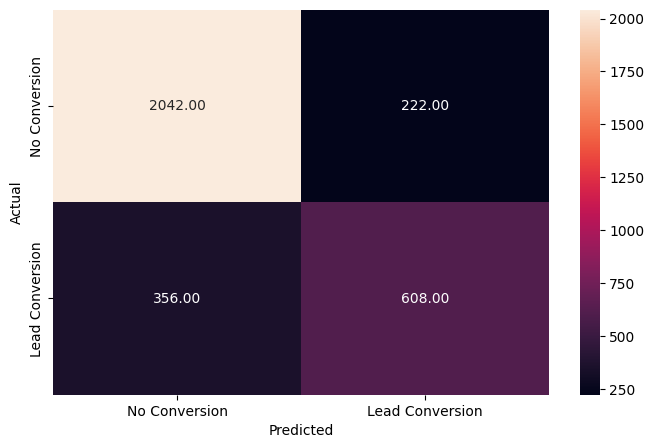

In [ ]:
# Checking the performance on the training data

y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       971
           1       0.76      0.62      0.68       413

    accuracy                           0.83      1384
   macro avg       0.80      0.77      0.78      1384
weighted avg       0.82      0.83      0.82      1384



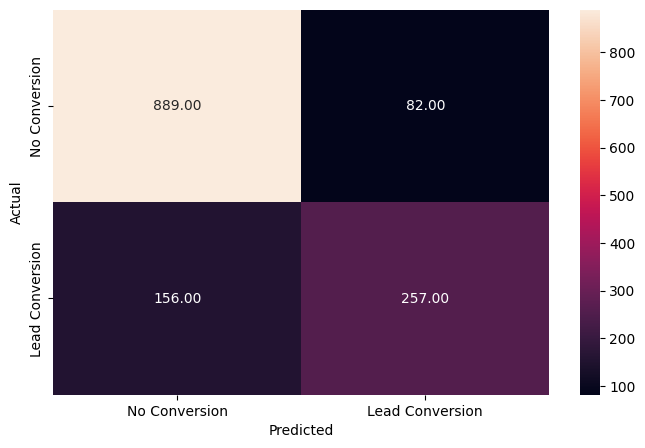

In [ ]:
# Checking the performance on the test dataset

y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

##### **Observations:**
- **Training data:** The recall is 63% and the precision is 73%.
- **Test data:** The recall is 62% and the precision is 76%.

- Here, **recall** is important parameter since ExtraaLearn needs to convert as many interested leads as possible to build its customer base, generate revenue, and gain market traction. Missing out on potential customers is a significant opportunity cost.

##### **Precision-Recall-Threshold Curve for Logistic Regression:**

Precision ≈ Recall ≈ 0.697 at Threshold = 0.435


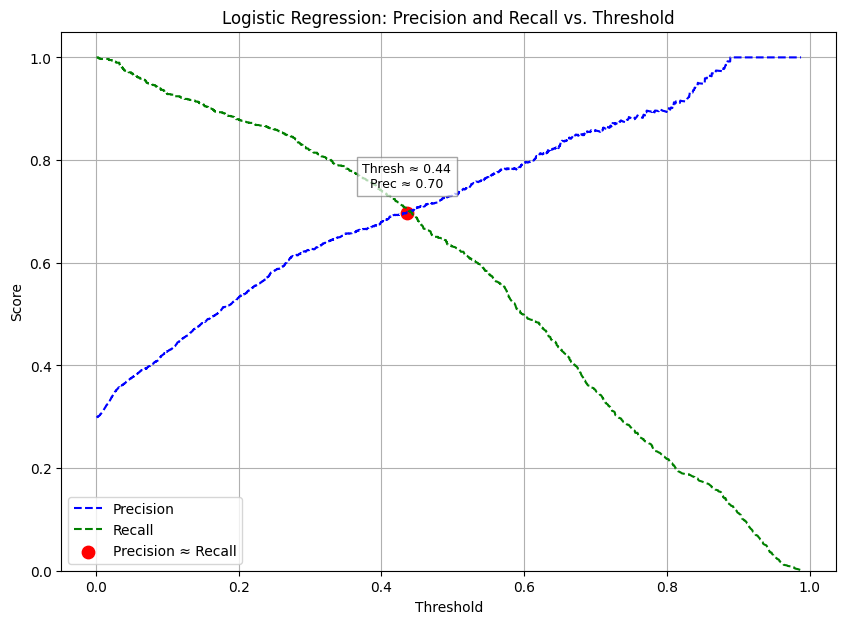

In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_scores_lg = lg.predict_proba(X_train_scaled)[:, 1]

# Compute precision, recall, thresholds
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg)

# Find point where precision ≈ recall
intersection_idx = None
for i in range(len(thresholds_lg)):
    if np.isclose(precisions_lg[i], recalls_lg[i], atol=1e-2):  # Tolerance of 0.01
        intersection_idx = i
        break

# Plot precision and recall vs threshold
plt.figure(figsize=(10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='Precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='Recall')

# Annotate the intersection point
if intersection_idx is not None:
    threshold_val = thresholds_lg[intersection_idx]
    precision_val = precisions_lg[intersection_idx]
    recall_val = recalls_lg[intersection_idx]

    plt.scatter(threshold_val, precision_val, color='red', s=80, label='Precision ≈ Recall')
    plt.text(threshold_val, precision_val + 0.05,
             f'Thresh ≈ {threshold_val:.2f}\nPrec ≈ {precision_val:.2f}',
             ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

    print(f"Precision ≈ Recall ≈ {precision_val:.3f} at Threshold = {threshold_val:.3f}")
else:
    print("No threshold found where precision ≈ recall within tolerance.")

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.ylim([0, 1.05])
plt.legend(loc='best')
plt.title("Logistic Regression: Precision and Recall vs. Threshold")
plt.grid(True)
plt.show();


##### **Checking the exact threshold  to see if it matches the value on graph**

In [ ]:
# Calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.4393831344911872


##### **Checking the confusion matrix after adjusting the threshold value**

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2264
           1       0.70      0.70      0.70       964

    accuracy                           0.82      3228
   macro avg       0.79      0.79      0.79      3228
weighted avg       0.82      0.82      0.82      3228



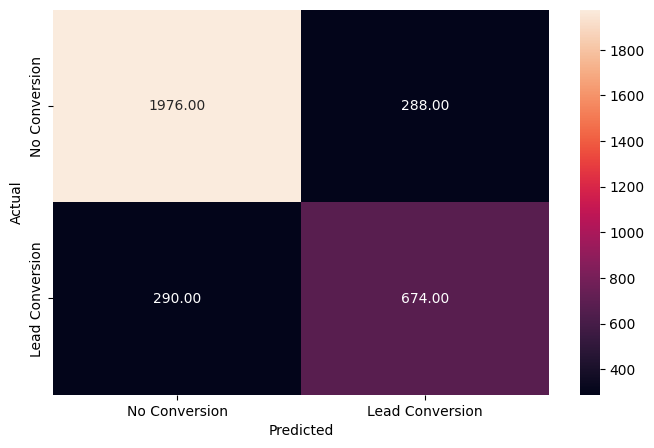

In [ ]:
optimal_threshold=.44
y_pred_train1 = lg.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train1[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       971
           1       0.72      0.69      0.70       413

    accuracy                           0.83      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.83      0.83      0.83      1384



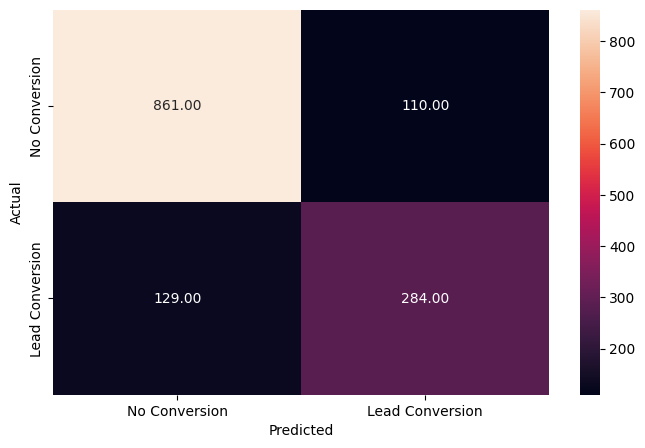

In [ ]:
optimal_threshold= .44
y_pred_test1 = lg.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test1[:,1]>optimal_threshold)

##### **Observations: For logistic regression**
- **Training data:** The recall is 70% and the precision is 70% for status 1.
- **Test data:** The recall is 69% and the precision is 70% for status 1.
- The recall values falls slightly for recall but overall the model fit well to both train and test data.

- Setting the threshold to 0.44 has increased values in training and test data.
- The model is giving a **similar performance on the test and train data** i.e. the model is giving a generalized performance.



In [ ]:
# Printing the coefficients of logistic regression

cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

# Finding the odds
odds = np.exp(lg.coef_[0])

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
time_spent_minutes,16.93405
first_interaction_Website,12.79384
referral_Yes,3.76726
last_activity_Website Activity,1.75158
age,1.37488
print_media_type2_Yes,1.13745
educational_channels_Yes,1.11339
digital_media_Yes,1.08471
print_media_type1_Yes,1.07532
page_views_per_visit,0.72697


##### **Observtions: Logistic Regression Feature Importance**
- 'Time Spent in minutes' followed by 'first_interaction_Website' are the features that lead to higher lead conversion.
- referral_Yes, last_activity_Website Activity, age, print_media_type2_Yes, educational_channels_Yes, digital_media_Yes, print_media_type1_Yes are also important contributing features.

#### **SVM**

##### Building models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

#### **Linear Kernel**

In [ ]:
# Fitting SVM for linear
svm = SVC(kernel = 'linear', probability=True, random_state=1) # Linear kernel or linear decision boundary
model = svm.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2264
           1       0.72      0.68      0.70       964

    accuracy                           0.83      3228
   macro avg       0.79      0.79      0.79      3228
weighted avg       0.82      0.83      0.82      3228



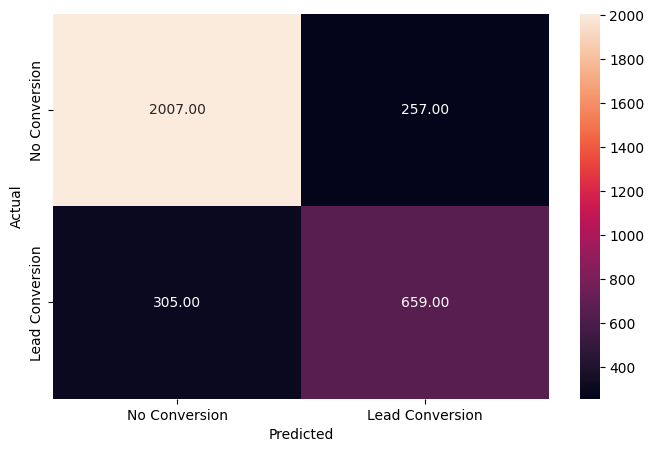

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       971
           1       0.73      0.68      0.71       413

    accuracy                           0.83      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.83      0.83      0.83      1384



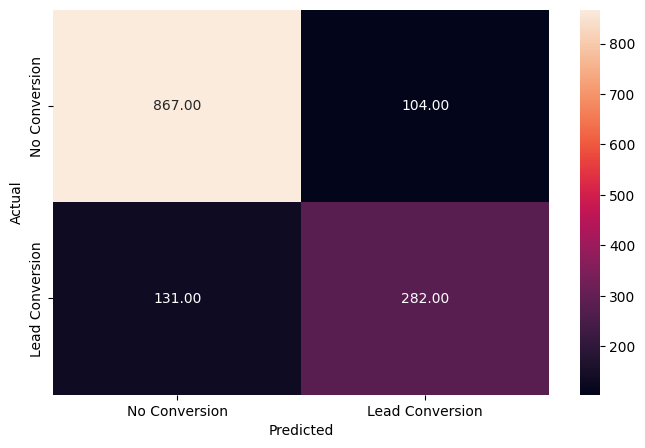

In [ ]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

##### **Observations: In SVM - Linear model**
- **Training data:** The recall is 68% and the precision is 72% for status 1.
- **Test data:** The recall is 68% and the precision is 73% for status 1.
- Recall of status 1 for the model is only around 68% which implies our model will not correctly predict the customers who are likely to convert.

#### **RBF Kernel**

In [ ]:
# Fitting SVM
svm_rbf = SVC(kernel = 'rbf', probability=True, random_state=1)
model = svm_rbf.fit(X = X_train_scaled, y = y_train)

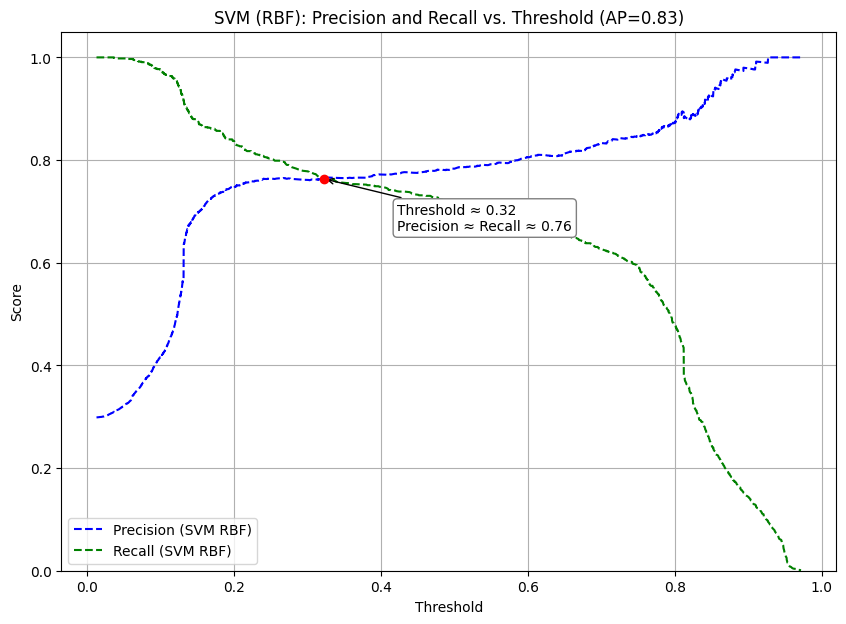

In [ ]:
# Predict probabilities for class 1
y_scores_svm = svm_rbf.predict_proba(X_train_scaled)[:, 1]

# Precision, recall, thresholds
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm)
ap_svm = average_precision_score(y_train, y_scores_svm)

# Find intersection point: precision ≈ recall
diff = np.abs(precisions_svm[:-1] - recalls_svm[:-1])  # Match length with thresholds
closest_idx = np.argmin(diff)
closest_threshold = thresholds_svm[closest_idx]
precision_at_closest = precisions_svm[closest_idx]
recall_at_closest = recalls_svm[closest_idx]

# Plot
plt.figure(figsize=(10, 7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='Precision (SVM RBF)')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label='Recall (SVM RBF)')

# Annotate intersection point
plt.scatter(closest_threshold, precision_at_closest, color='red', zorder=5)
plt.annotate(
    f'Threshold ≈ {closest_threshold:.2f}\nPrecision ≈ Recall ≈ {precision_at_closest:.2f}',
    xy=(closest_threshold, precision_at_closest),
    xytext=(closest_threshold + 0.1, precision_at_closest - 0.1),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')
)

# Final formatting
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title(f'SVM (RBF): Precision and Recall vs. Threshold (AP={ap_svm:.2f})')
plt.legend(loc='best')
plt.ylim([0, 1.05])
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2264
           1       0.76      0.76      0.76       964

    accuracy                           0.86      3228
   macro avg       0.83      0.83      0.83      3228
weighted avg       0.86      0.86      0.86      3228



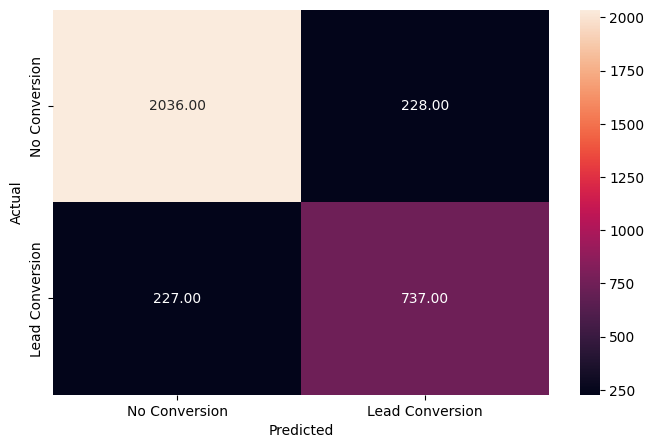

In [ ]:
optimal_threshold1=0.32
y_pred_train_rbf = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train_rbf[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       971
           1       0.72      0.71      0.72       413

    accuracy                           0.83      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.83      0.83      0.83      1384



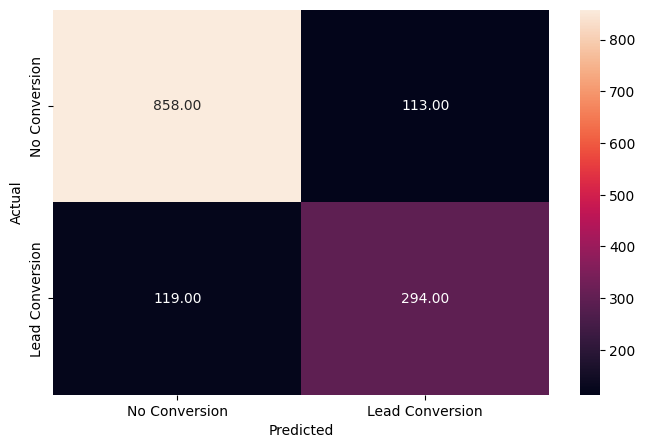

In [ ]:
y_pred_test_rbf = svm_rbf.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test_rbf[:,1]>optimal_threshold1)

##### **Observations: In SVM - RBF model**
- **Training data:** The recall is 76% and the precision is 76% for status 1.
- **Test data:** The recall is 71% and the precision is 72%.

- Setting the threshold value = 0.32 has significantly contributed to improvement of the model.
- The recall has improved from 0.68 to .76 which is a ~10% increase and the model is giving good generalized results.
- Moreover, the kernel used to create this is rbf, hence model is performing good with non-linear kernel.
- As the recall is good, **this model will perform well** in differentiating out those customers who have a high chance of leaving the bank, meaning it will eventually help in reducing the attrition rate.

## Building a Decision Tree model

In [ ]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



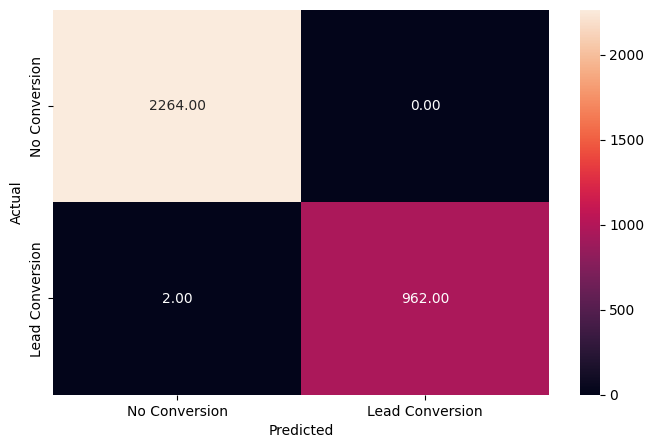

In [ ]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       971
           1       0.66      0.63      0.65       413

    accuracy                           0.79      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



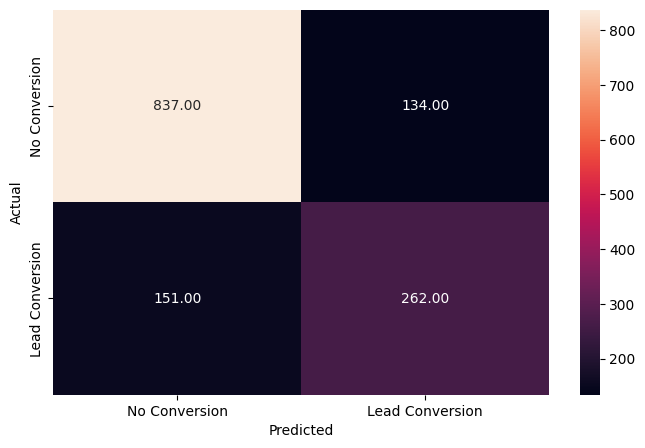

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

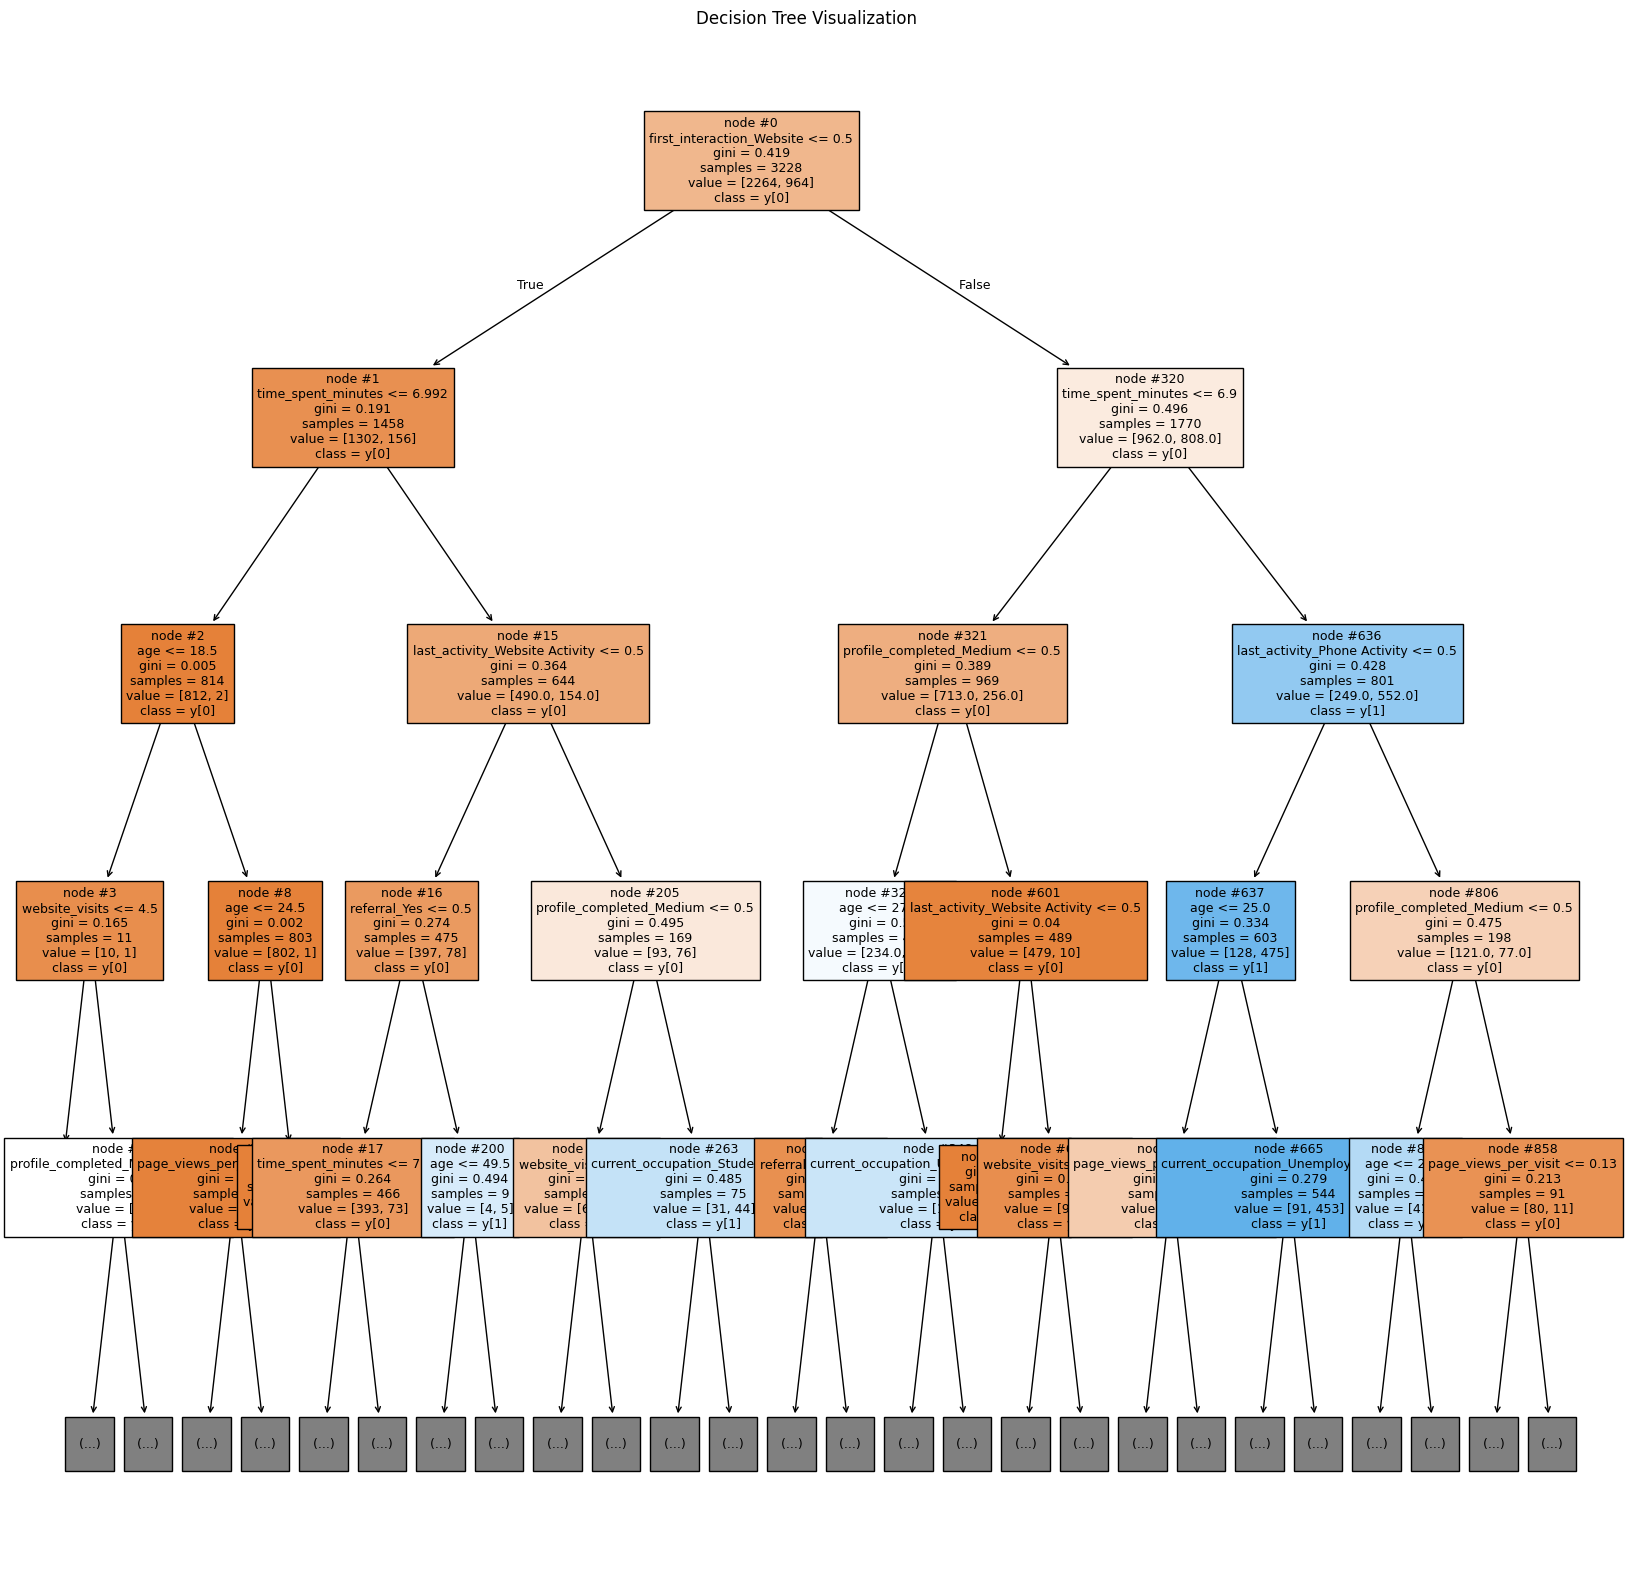

In [ ]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.title("Decision Tree Visualization")
plt.show()

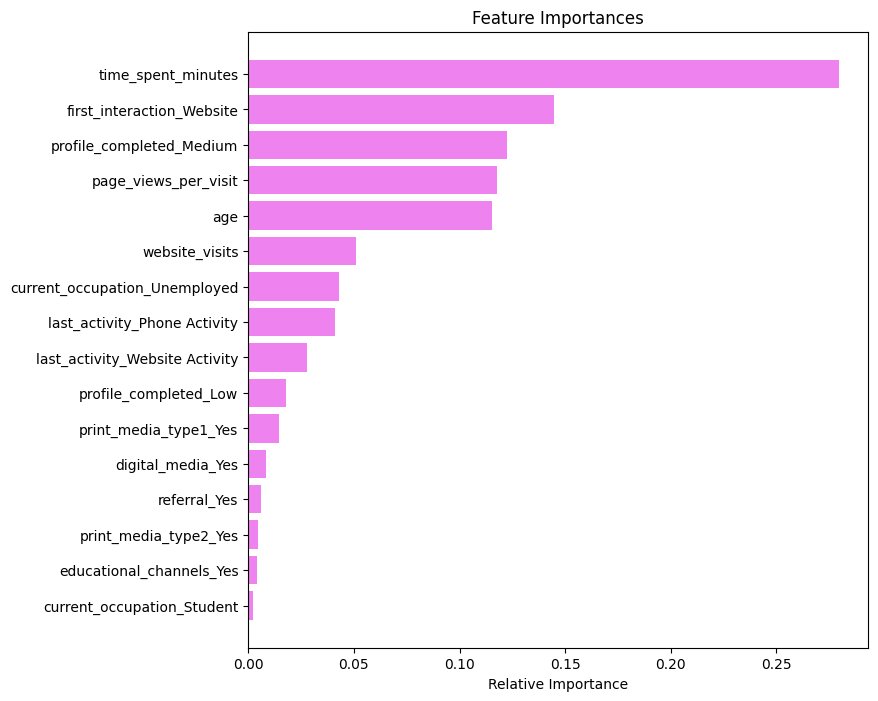

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### **Observation for Decision Tree model:**

- The decision tree model has overfit on the training dataset.
- Test data: The recall value is 63% and the precision value is 66% for status 1.
- The decision tree diagram shows that the data has fit to achieve pure nodes.

- **time_spent_minutes** followed by **first_interaction_Website, profile_completed_Medium, page_views_per_visit, age** are the most important features that decides on customer lead conversion.

## Do we need to prune the tree?

- Yes, the decision tree has **overfit** and needs to be pruned since it achieves high accuracy on the training set but a noticeably lower accuracy on a validation set or test set.
- We will be using hyperparameter tuning via GridSearch CV to prune and StratifiedKFold for cross-validation.


Fitting Decision Tree with GridSearchCV...
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV F1 Score: 0.8195

Train Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2264
           1       0.70      0.84      0.76       964

    accuracy                           0.85      3228
   macro avg       0.81      0.84      0.82      3228
weighted avg       0.86      0.85      0.85      3228



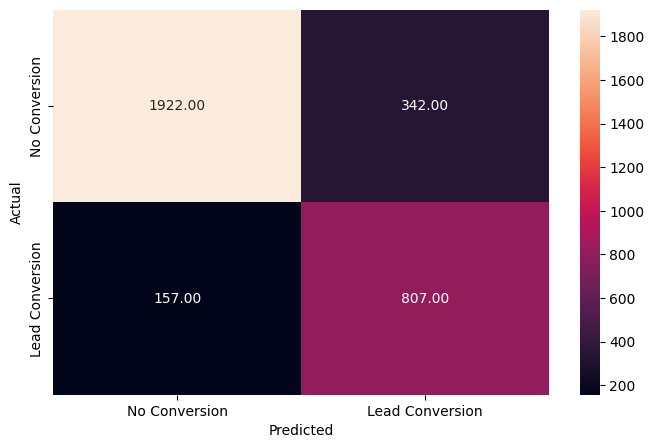


Test Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.68      0.82      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



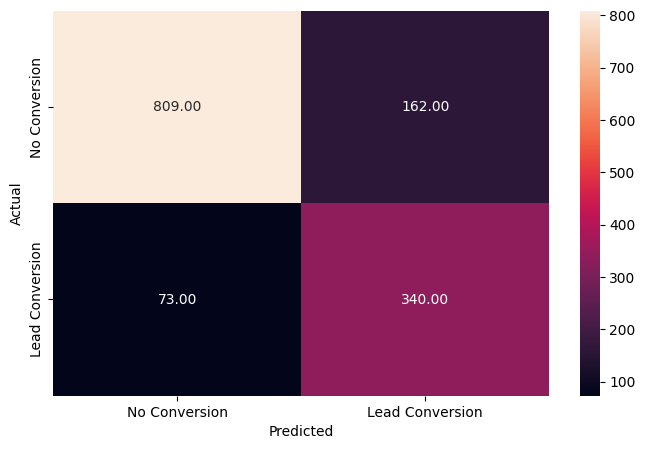

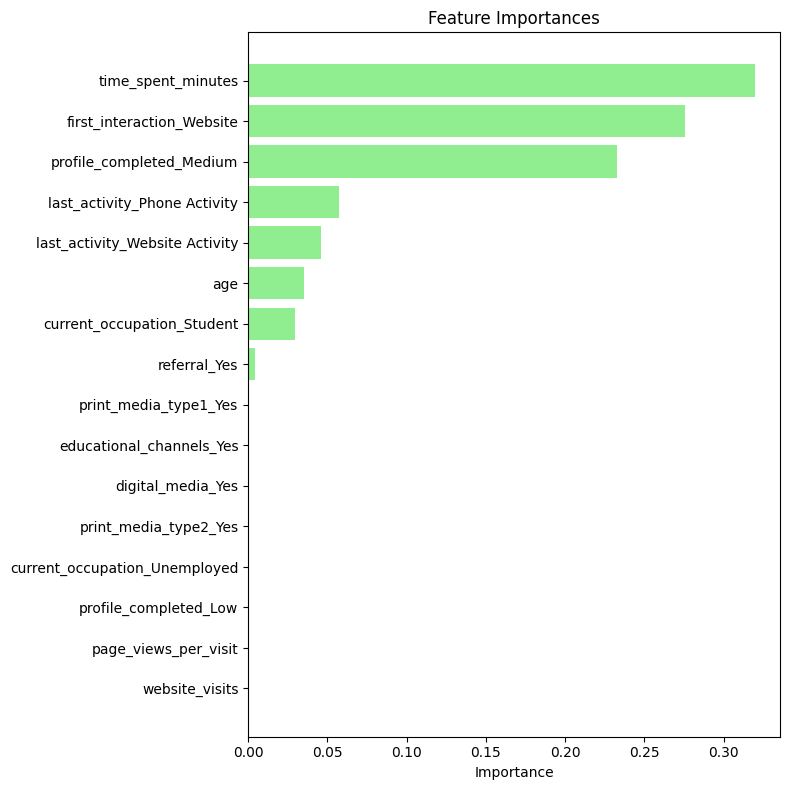

In [ ]:
# Define model and parameter grid
dt_model = DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy'],    # Splitting criterion
}

# Cross-validation and scorer
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scorer = make_scorer(recall_score, pos_label=1) # Giving priority to recall

# Grid search
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    verbose=1
)

print("Fitting Decision Tree with GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV F1 Score: {grid_search.best_score_:.4f}")

# Evaluate on train and test
print("\nTrain Evaluation:")
metrics_score(y_train, best_dt.predict(X_train))

print("\nTest Evaluation:")
metrics_score(y_test, best_dt.predict(X_test))

# Feature importances
importances = best_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightgreen")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


##### **Precision-Recall Curve for Tuned Decision Tree**

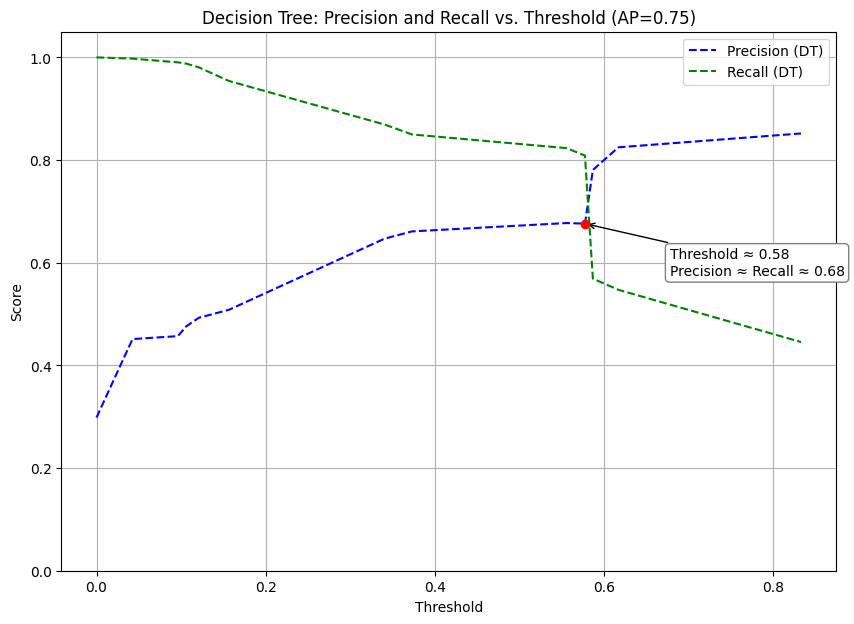

In [ ]:
# --- Precision-Recall Curve for Tuned Decision Tree ---
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for class 1
y_probs_dt = best_dt.predict_proba(X_test)[:, 1]

# Precision, recall, thresholds
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_probs_dt)
ap_dt = average_precision_score(y_test, y_probs_dt)

# Find closest point where precision ≈ recall
diff = np.abs(precision_dt[:-1] - recall_dt[:-1])  # thresholds shorter by 1
closest_idx = np.argmin(diff)
closest_threshold = thresholds_dt[closest_idx]
precision_at_closest = precision_dt[closest_idx]
recall_at_closest = recall_dt[closest_idx]

# Plot Precision and Recall vs. Threshold
plt.figure(figsize=(10, 7))
plt.plot(thresholds_dt, precision_dt[:-1], 'b--', label='Precision (DT)')
plt.plot(thresholds_dt, recall_dt[:-1], 'g--', label='Recall (DT)')

# Annotate intersection point
plt.scatter(closest_threshold, precision_at_closest, color='red', zorder=5)
plt.annotate(
    f'Threshold ≈ {closest_threshold:.2f}\nPrecision ≈ Recall ≈ {precision_at_closest:.2f}',
    xy=(closest_threshold, precision_at_closest),
    xytext=(closest_threshold + 0.1, precision_at_closest - 0.1),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')
)

# Final plot setup
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title(f'Decision Tree: Precision and Recall vs. Threshold (AP={ap_dt:.2f})')
plt.legend(loc='best')
plt.ylim([0, 1.05])
plt.grid(True)
plt.show()


- The optimal threshold value for the hyperparameter tuned decision tree is 0.58

##### **Plotting Decision Tree Visualization with Hyperparameter Tuning**

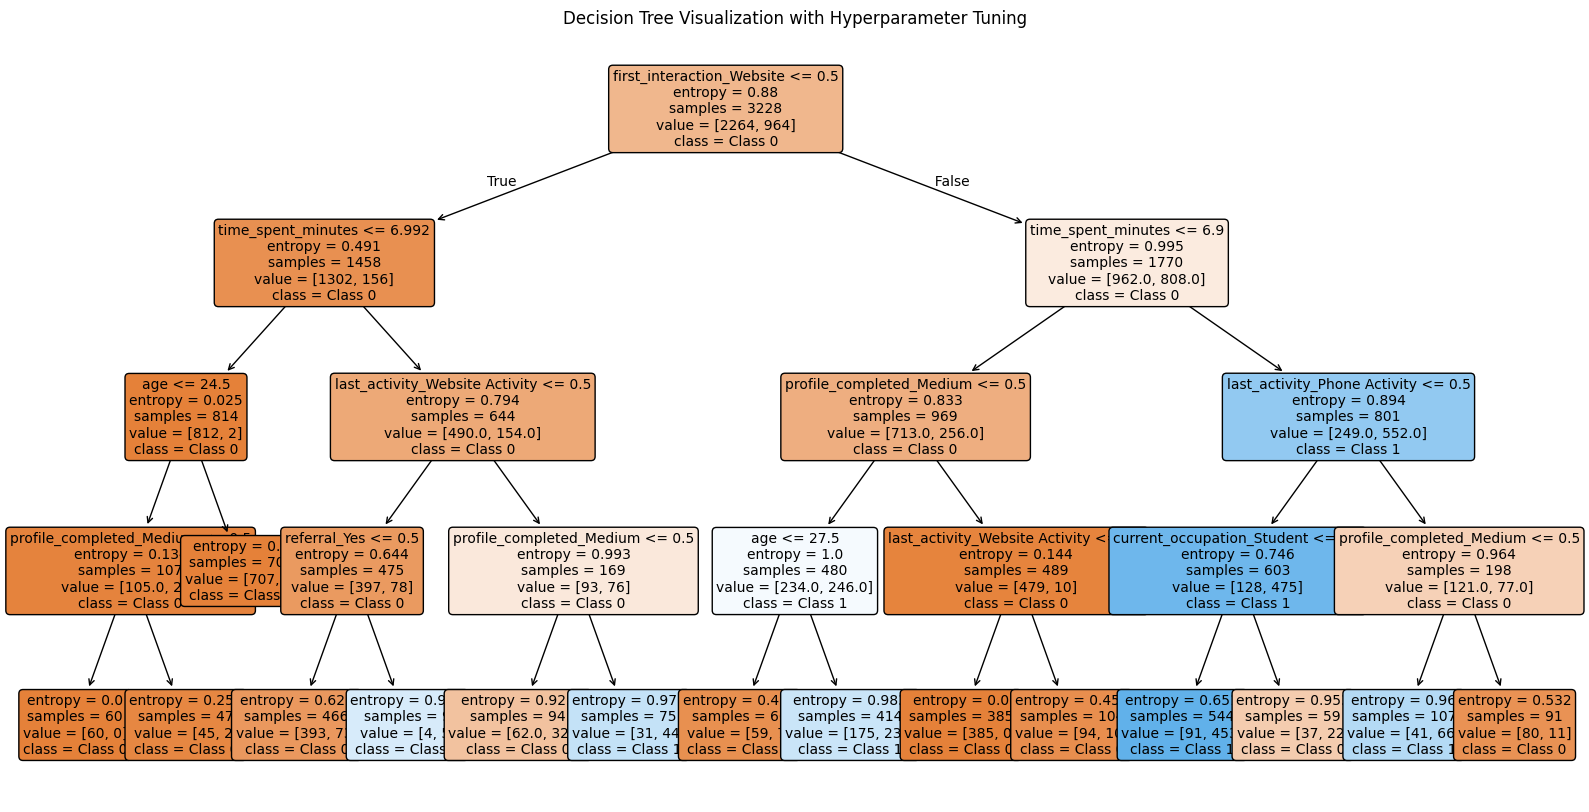

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Adjust size based on tree depth
plot_tree(
    best_dt,
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],  # Adjust if you have more than 2 classes
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization with Hyperparameter Tuning")
plt.show()


#### **Observation for Decision Tree after hyperparameter tuning:**
- Training set : The recall is 89% and the precision is 66% for status 1.
- Test set: The recall is 87% and the precison is 64% for status 1.

- Feature Importance: **time_spent_minutes** is the most important feature followed by **first_interaction_Website, profile_completed_Medium.**
- last_activity_Website Activity, last_activity_Phone Activity, age are also important features.

- Optimal threshold of the curve is at 0.58.
- Visualization after hyperparameter shows the pruned tree.
-- It can be noted after applying hyperparameter tuning the most important feature is still **first_interaction_Website.**

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1) #the mentor does some hyperparameter tuning here. this is something he adds on his own. the result is same.

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



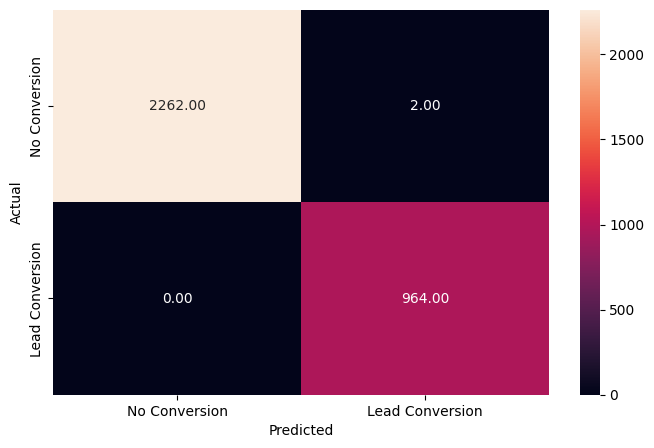

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



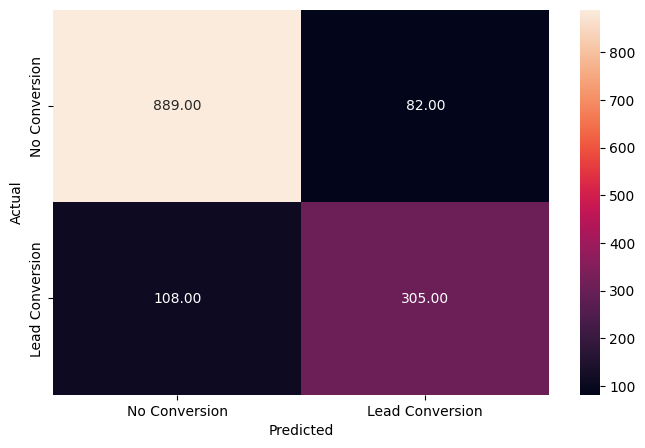

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

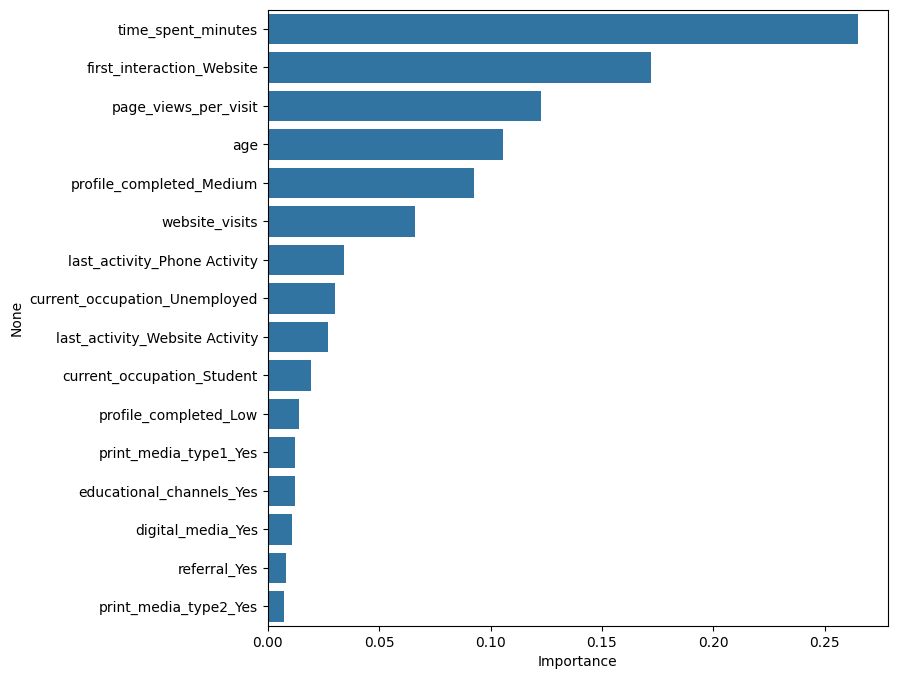

In [ ]:
importances = rf_estimator.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8,8))
sns.barplot(x = importance_df.Importance, y = importance_df.index);

#### **Observation for Random Forest:**
- Training set : The data is **overfitting.**
- Test set: The recall is 74% and the precison is 79% for status 1.

- Feature Importance: **time_spent_minutes** is the most important feature followed by **first_interaction_Website.**
- *page_views_per_visit, age, profile_completed_Medium, website_visits* are also important features.


## Do we need to prune the tree?

Yes, since the random forest is **overfitting** on the train data we need to prune the tree.

Fitting Random Forest with GridSearchCV...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Recall Score: 0.8309

Train Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2264
           1       0.77      0.90      0.83       964

    accuracy                           0.89      3228
   macro avg       0.86      0.89      0.87      3228
weighted avg       0.90      0.89      0.89      3228



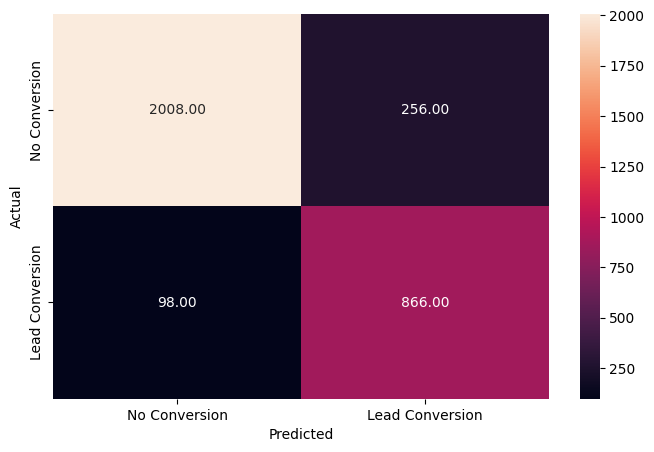


Test Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       971
           1       0.71      0.81      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.84      0.82      1384
weighted avg       0.86      0.85      0.85      1384



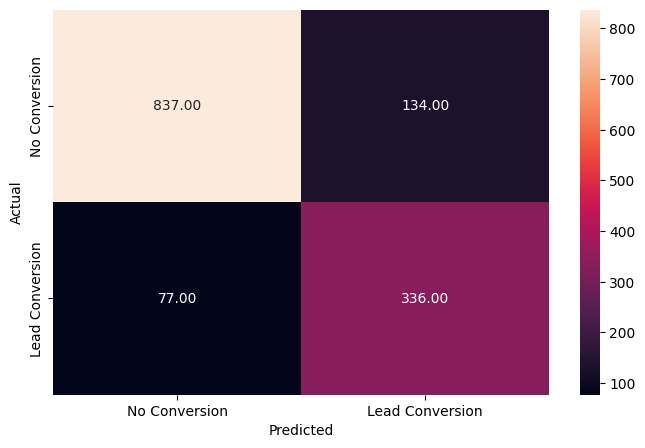

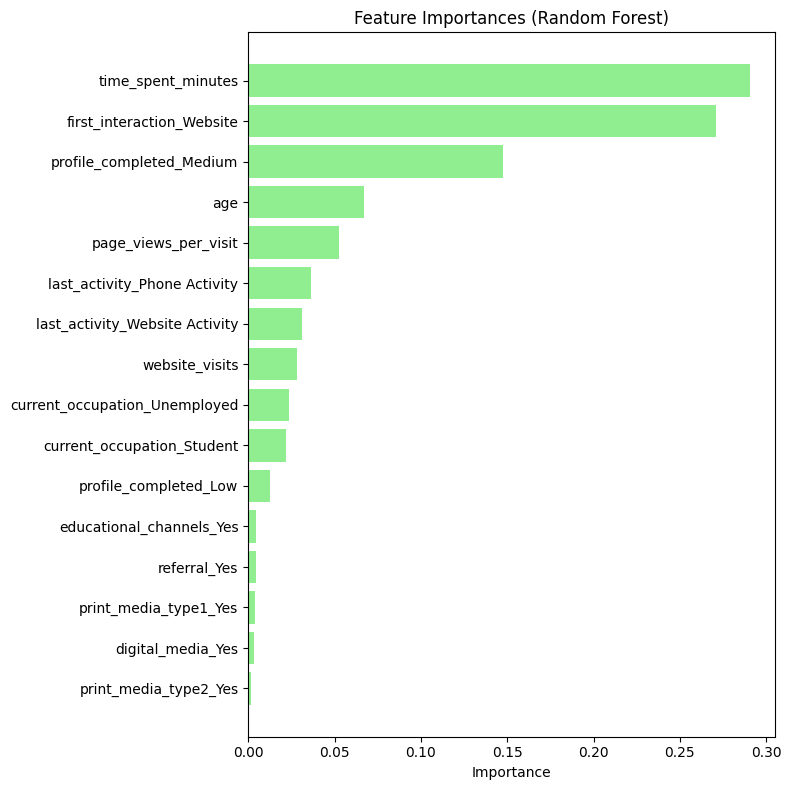

In [ ]:
# 1. Define the model
rf_model = RandomForestClassifier(random_state=1)

# 2. Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],                 # Number of trees
    'max_depth': [None, 10, 20],                # Tree depth
    'min_samples_split': [2, 5, 10],            # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Min samples in a leaf
    'class_weight': [None, 'balanced'],         # Handle imbalance
    'criterion': ['gini', 'entropy']            # Splitting criterion
}

# 3. Cross-validation and scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scorer = make_scorer(recall_score)  # Prioritizing recall

# 4. Grid search
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the model
print("Fitting Random Forest with GridSearchCV...")
grid_search_rf.fit(X_train, y_train)

# 6. Best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Parameters:", grid_search_rf.best_params_)
print(f"Best CV Recall Score: {grid_search_rf.best_score_:.4f}")

# 7. Evaluation
print("\nTrain Evaluation:")
metrics_score(y_train, best_rf.predict(X_train))

print("\nTest Evaluation:")
metrics_score(y_test, best_rf.predict(X_test))

# 8. Feature Importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], color="lightgreen")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

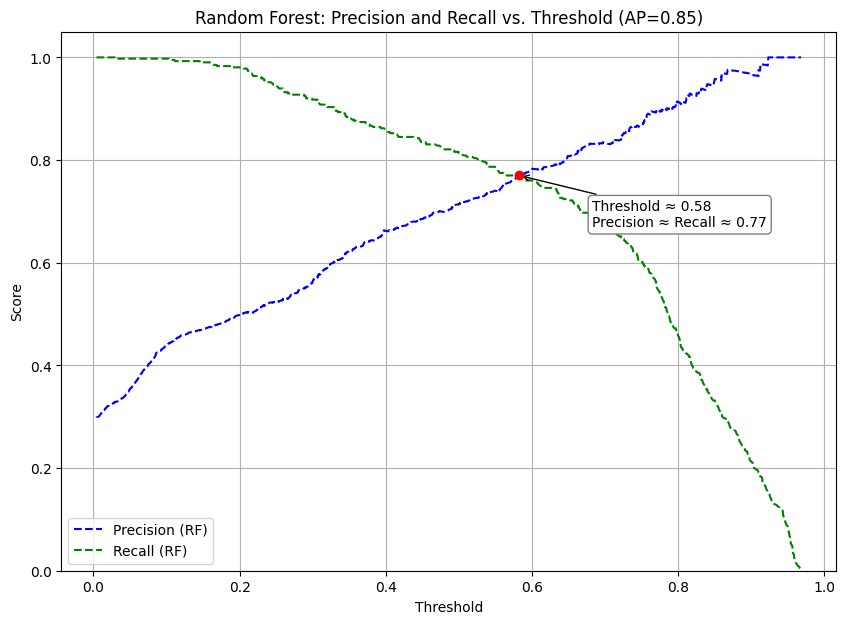

In [ ]:
# Get predicted probabilities
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]

# Get precision, recall, thresholds
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
ap_rf = average_precision_score(y_test, y_probs_rf)

# Calculate where precision and recall are closest
diff = np.abs(precision_rf[:-1] - recall_rf[:-1])  # exclude last point (no threshold)
closest_index = np.argmin(diff)
closest_threshold = thresholds_rf[closest_index]
precision_at_closest = precision_rf[closest_index]
recall_at_closest = recall_rf[closest_index]

# Plot
plt.figure(figsize=(10, 7))
plt.plot(thresholds_rf, precision_rf[:-1], 'b--', label='Precision (RF)')
plt.plot(thresholds_rf, recall_rf[:-1], 'g--', label='Recall (RF)')

# Annotate intersection point
plt.scatter(closest_threshold, precision_at_closest, color='red', zorder=5)
plt.annotate(
    f'Threshold ≈ {closest_threshold:.2f}\nPrecision ≈ Recall ≈ {precision_at_closest:.2f}',
    xy=(closest_threshold, precision_at_closest),
    xytext=(closest_threshold + 0.1, precision_at_closest - 0.1),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')
)

# Final plot formatting
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title(f'Random Forest: Precision and Recall vs. Threshold (AP={ap_rf:.2f})')
plt.legend(loc='best')
plt.ylim([0, 1.05])
plt.grid(True)
plt.show()

#### **Observation for Random Forest after hyperparameter tuning:**
- Training set : The recall is 90% and the precision is 77% for status 1.
- Test set: The recall is 81% and the precison is 71% for status 1.
- Although, the recall values is little less whem comparing the training set, the model fits well with high recall.

- Feature Importance: **time_spent_minutes** is the most important feature followed by **first_interaction_Website, profile_completed_Medium.**

- `age`, `page_views_per_visit`, `last_activity_Phone Activity`, `last _activity_Website Activity`, `website_visits`, `current _occupation_Unemployed`, `current_occupation_Student`, are also important features.

- It can be noted after applying hyperparameter tuning the most important feature in random forest is still **time_spent_minutes.**

- The Random Forest further verifies the results from the decision tree that the most important features are `time_spent_minutes` and `first_interaction_Website`.

## Actionable Insights and Recommendations



Model Performance Summary:

                     Accuracy  Precision  Recall  F1 Score
Model                                                     
Logistic Regression   0.82800    0.75200 0.63200   0.68700
SVM (Linear)          0.82900    0.72800 0.68500   0.70600
SVM (RBF)             0.84200    0.76600 0.67600   0.71800
Decision Tree         0.83000    0.67700 0.82300   0.74300
Random Forest         0.84800    0.71500 0.81400   0.76100


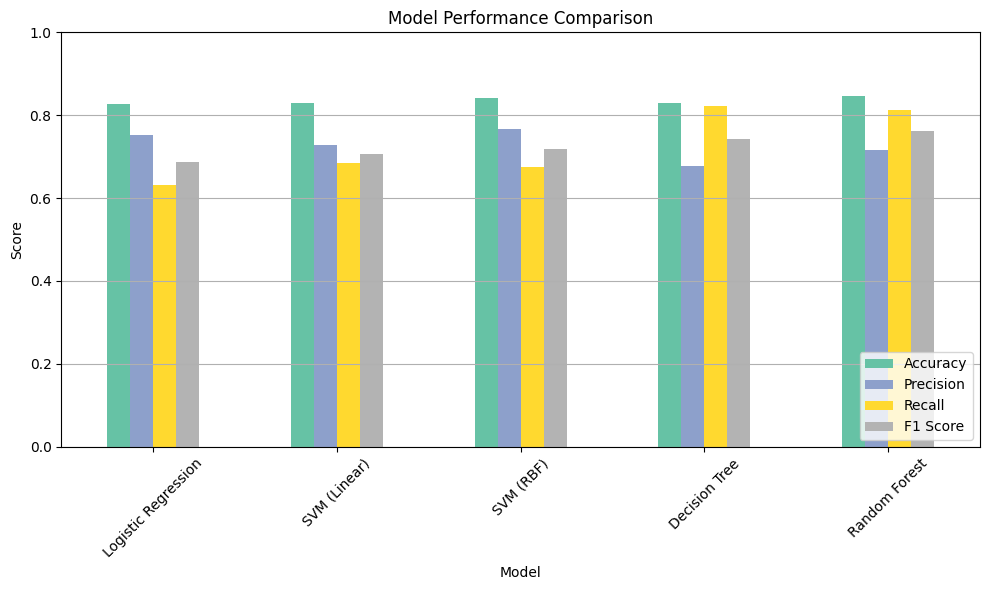


✅ Recommended Model (based on highest Recall): Decision Tree


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# === Preprocessing for models that need scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Define and train models ===

models = {
    'Logistic Regression': lg,
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=1),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=1),
    'Decision Tree': best_dt,  # Already tuned
    'Random Forest': best_rf   # Already tuned
}

results = []

for name, model in models.items():
    # Use scaled data for models that need it (LogReg, SVMs)
    if 'SVM' in name or 'Logistic' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Collect metrics
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

# === Results Table ===
results_df = pd.DataFrame(results).set_index('Model')
print("\nModel Performance Summary:\n")
print(results_df.round(3))

# === Plotting ===
results_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Recommend Best Model ===
best_model = results_df['Recall'].idxmax()
print(f"\n✅ Recommended Model (based on highest Recall): {best_model}")


Here we have;
* Analyzed and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.


#### **Key Model**

* **Use Random Forest** for lead scoring (best F1-score) to prioritize high-potential leads.
* **Leverage Decision Tree rules** to fast-track leads matching strong conversion patterns (high recall).



#### **Actionable Insights**

1. **High Website Engagement** and **Profile Completion** strongly predict conversions.
2. **Digital media, educational channels**, and **referrals** outperform print ads.
3. **Phone/SMS interactions** lead to higher conversions than email or website-only activity.
4. **Professionals convert more** than students/unemployed.
5. **Website-origin leads** show slightly better engagement than app-origin ones.


#### **Recommendations**

* Prioritize leads with **high profile completion, strong engagement, and phone activity**.
* Use ML to **score and filter leads automatically**.
* **Boost phone outreach** early in the funnel.
* **Shift marketing spend** to digital, educational, and referral channels.
* **Nudge inactive but promising leads** via personalized messages.
* **Segment content** by occupation to better match user intent.


